In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Re-create the "sales_data.csv" by including more metrics related to buying behaviors

raw_data = pd.read_csv('ifood.csv')

sales_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
    'MntTotal', 'MntRegularProds', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
    'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmpOverall'
]

sales_data = raw_data[sales_columns]

output_file_path = '/Users/mac/F24_DATA110/Project/F1/sales_data.csv'
sales_data.to_csv(output_file_path, index=False)

output_file_path

'/Users/mac/F24_DATA110/Project/F1/sales_data.csv'

In [4]:
sales_data = pd.read_csv('sales_data.csv')
sales_data

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,MntRegularProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmpOverall
0,635,88,546,172,88,88,1529,1441,3,8,10,4,7,0,0,0,0,0,0
1,11,1,6,2,1,6,21,15,2,1,1,2,5,0,0,0,0,0,0
2,426,49,127,111,21,42,734,692,1,8,2,10,4,0,0,0,0,0,0
3,11,4,20,10,3,5,48,43,2,2,0,4,6,0,0,0,0,0,0
4,173,43,118,46,27,15,407,392,5,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,709,43,182,42,118,247,1094,847,2,9,3,4,5,0,0,0,0,0,0
2201,406,0,30,0,0,8,436,428,7,8,2,5,7,0,0,0,1,0,1
2202,908,48,217,32,12,24,1217,1193,1,2,3,13,6,0,1,0,0,0,1
2203,428,30,214,80,30,61,782,721,2,6,5,10,3,0,0,0,0,0,0


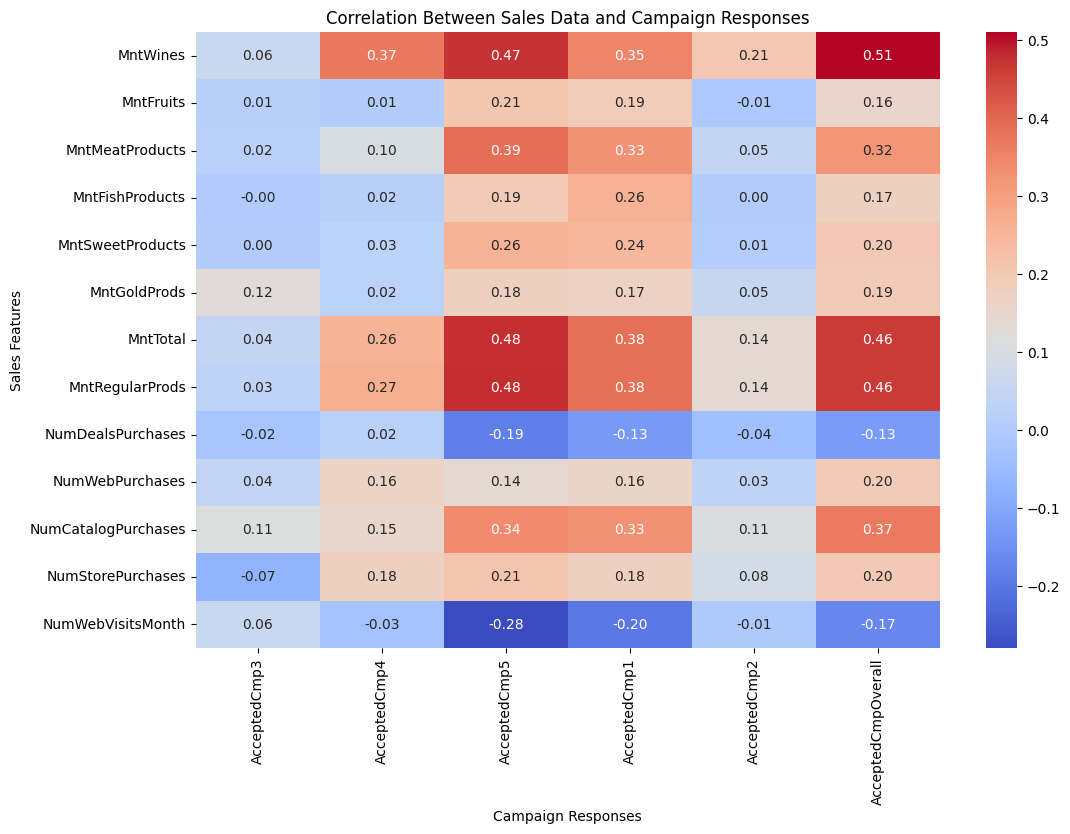

In [ ]:
# Heatmap for the correlation between all sales metrics and all campaigns

sales_data = pd.read_csv('sales_data.csv')

sales_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'MntTotal', 'MntRegularProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]
campaign_columns = [
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
    'AcceptedCmpOverall'
]

correlation_matrix = sales_data[sales_columns + campaign_columns].corr()
correlation_with_campaigns = correlation_matrix.loc[sales_columns, campaign_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_campaigns, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Between Sales Data and Campaign Responses')
plt.xlabel('Campaign Responses')
plt.ylabel('Sales Features')
plt.show()

In [31]:
# Decision tree between sales data and overall acceptance of campaign

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

X = sales_data[sales_columns]
y = sales_data['AcceptedCmpOverall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sales_decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
sales_decision_tree.fit(X_train, y_train)

# Decision tree's rule

tree_rules = export_text(sales_decision_tree, feature_names=sales_columns)

print(tree_rules)

# Visualize the decision tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,20), dpi = 600)
tree.plot_tree(sales_decision_tree)

|--- MntWines <= 674.50
|   |--- MntWines <= 344.50
|   |   |--- NumStorePurchases <= 2.50
|   |   |   |--- MntGoldProds <= 7.50
|   |   |   |   |--- NumCatalogPurchases <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- NumCatalogPurchases >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- MntGoldProds >  7.50
|   |   |   |   |--- MntTotal <= 42.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- MntTotal >  42.50
|   |   |   |   |   |--- class: 0
|   |   |--- NumStorePurchases >  2.50
|   |   |   |--- MntWines <= 87.50
|   |   |   |   |--- NumWebVisitsMonth <= 8.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- NumWebVisitsMonth >  8.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- MntWines >  87.50
|   |   |   |   |--- NumStorePurchases <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- NumStorePurchases >  3.50
|   |   |   |   |   |--- class: 0
|   |--- MntWines >  344.50
|   |   |--- MntMeatProducts <= 34.50
|   |   |   |--- MntTo

[Text(0.5688775510204082, 0.9166666666666666, 'x[0] <= 674.5\ngini = 0.36\nsamples = 1543\nvalue = [1210, 233, 62, 29, 9]'),
 Text(0.3010204081632653, 0.75, 'x[0] <= 344.5\ngini = 0.245\nsamples = 1293\nvalue = [1113, 154, 21, 4, 1]'),
 Text(0.43494897959183676, 0.8333333333333333, 'True  '),
 Text(0.16326530612244897, 0.5833333333333334, 'x[11] <= 2.5\ngini = 0.175\nsamples = 969\nvalue = [876.0, 84.0, 5.0, 3.0, 1.0]'),
 Text(0.08163265306122448, 0.4166666666666667, 'x[5] <= 7.5\ngini = 0.33\nsamples = 163\nvalue = [129, 34, 0, 0, 0]'),
 Text(0.04081632653061224, 0.25, 'x[10] <= 1.5\ngini = 0.105\nsamples = 72\nvalue = [68, 4, 0, 0, 0]'),
 Text(0.02040816326530612, 0.08333333333333333, 'gini = 0.081\nsamples = 71\nvalue = [68, 3, 0, 0, 0]'),
 Text(0.061224489795918366, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(0.12244897959183673, 0.25, 'x[6] <= 42.5\ngini = 0.442\nsamples = 91\nvalue = [61.0, 30.0, 0.0, 0.0, 0.0]'),
 Text(0.10204081632653061, 0.0

The correlation analysis reveals that customer spending patterns strongly influence campaign responses, with higher spending on wines (`MntWines`) and total spending (`MntTotal`) being key predictors of success. Catalog purchases (`NumCatalogPurchases`) also show a significant positive correlation, indicating the effectiveness of campaigns targeting catalog shoppers. Conversely, deal-driven purchases (`NumDealsPurchases`) and frequent web visits (`NumWebVisitsMonth`) demonstrate weak or negative correlations, suggesting these customers are less likely to engage with campaigns. These insights highlight the importance of focusing on high-value customers and tailoring campaigns to align with their specific spending preferences, such as promoting wine-related offers or leveraging catalog-based targeting, while avoiding broad strategies that target less responsive segments.